# **Tutorial 12: Practical Examples of OOP Paradigm** 👀

Computer games are quite suitable to practice **object oriented modelling** and **design**. Making simple games can demonstrate the effectiveness of **object orientation** to easily scale projects and build larger software components. In these special themed mini-projects, we will develop simple games using **object oriented approach**.

<br><br><a id='t1cls'></a>
## ▙▂ **Part 4: Bouncing Balls ▂▂**

In the fourth mini-project, we will make a Pygame application that will bounce balls on the screen. We will start by creating two classes, `Ball` and `Cage`. Then, we will inherit `GameTemplate` from the previous project and extend it in such a way, that will allow it to contain, update and reflect multiple `Ball` objects.

<a id='t12p4toc'></a>

#### Contents: ####
- [Imports and Constants (colors)](#t12p4start)
    - [Reusing GameTemplate](#t12p4rgt)
- [Cage class](#t12p4cage)
    - [Drawing Rectangle in Pygame](#t12p4drp)   
- [Ball class](#t12p4ball)
    - [`spawn_ball()`](#t12p4sb)
- [Exercise: Multiple Bouncing Balls](#t12p4ex)
    - [Challenge: Ball's Life Span](#t12p4bls)
- [Collision](#t12p4collision)
- [Bouncing Balls Game](#t12p4bbg)
- [Discussion](#t12p4discussion)


<a id='t12p4start'></a>
#### **▇▂ Imports and Constants (colors) ▂▂**

Before we begin with classes, let us import what we need. Also, in the previous mini-project we were giving colors as RGB tuples, but that process can be tedious. Therefore, we will create constants to represent the colors we need. We will also add few constants to control `Ball` behavior, which will be mentioned later.

In [ ]:
## IMPORT SECTION
import pygame

# Note: if you run this in Pyzo, we expect that
#   GameTemplate is saved in module gametemplate.
# from gametemplate import GameTemplate

## USEFUL CONSTANTS
WHITE   = (255, 255, 255)
RED     = (255, 0, 0)
GREEN   = (0, 255, 0)
BLUE    = (0 , 0, 255)
BLACK   = (0, 0, 0)

# feel free to modify later and observe changes
BALL_COLORS = (WHITE, RED, GREEN, BLUE)
BALL_RADIUS_RANGE = (10, 30)
BALL_VELOCITY_RANGE = (1, 5)

<br>[back to top ↥](#t12p4toc)

<a id='t12p4rgt'></a>
##### **Reusing GameTemplate**

Note: if you run the code in Jupyter, just execute the cell below. This is the code from mini-project 3 that is reused here. If you want to run code locally, copy-paste the code from below into your Python IDE and save it as the module named `gametemplate`.

In [ ]:
## CONSTANTS & GLOBALS

DEBUG = True

FPS = 30
WINDOW = (800, 600)
CAPTION = "ANALYSIS3 - obj. orient. game template"



## GAMETEMPLATE CLASS

class GameTemplate:
    """
    GameTemplate class encapsulates basic game loop that
    is implemented via pygame library.
    Override and implement game loop methods for your specific game.
    """

    def __init__(self):
        self.__running = True
        self._fps = None
        self._window = None
        self._display = None
        self._surface = None
        self._clock = None
        self._caption = None

        self._initialize_pygame()

    # gets & sets

    def get_display(self):
        return self._display

    def get_surface(self):
        return self._surface

    def set_fps(self, fps):
        self._fps = fps

    def get_fps(self):
        return self._fps

    def set_window(self, width, height):
        self._window = (width, height)

    def get_window(self):
        return self._window

    def set_caption(self, caption):
        self._caption = caption

    def get_caption(self):
        return self._caption

    # handy methods

    def log(self, text, debug_mode = DEBUG):
        if debug_mode:
            print(text)


    # encapsulating Pygame

    def _initialize_pygame(self):
        pygame.init()
        self._display = pygame.display
        self._clock = pygame.time.Clock()

    def _launch_pygame_window(self, width, height, fps, caption):
        self.set_window(width, height)
        self.set_fps(fps)

        self._display.set_caption(caption)
        self._display.set_mode(self._window)
        self._surface = self._display.get_surface()
        self._surface.fill((0,0,0))


    # to be extended by a child class
    def start(self):
        # If window size, FPS and caption have not been set, use default values
        if self._window == None:
            window = WINDOW
        else:
            window = self._window

        if self._fps == None:
            fps = FPS
        else:
            fps = self._fps

        if self._caption == None:
            caption = CAPTION
        else:
            caption = self._caption

        self._launch_pygame_window(window[0], window[1], fps, caption)
        self.__running = True

    def _deallocate_memory(self):
        pygame.quit()

    # to be extended by a child class
    def finish(self):
        self._deallocate_memory()

    def _check_quit_event(self, event):
        # default quit events
        # quit sent by the system
        if event.type == pygame.QUIT:
            self.__running = False
            self.log("QUIT event received. Shutting down.")

        # user pressed ESC
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                self.__running = False
                self.log("User pressed ESC.")

    # to be overridden by a child class
    def process_event(self, event):
        pass

    def do_events(self):
        # check new events; handle quit if received;
        # send all other events to process_event for handling
        for event in pygame.event.get():
            self._check_quit_event(event)
            self.process_event(event)

    # to be overridden by a child class
    def do_game_logic(self):
        pass

    # to be overridden by a child class
    def draw(self):
        self._surface.fill((0,0,0))

    def _end_frame(self):
        # steps taken at the end of each frame
        self._display.update()
        self._clock.tick(self._fps)

    # can be extended by a child class, or only extend draw()
    def do_frame(self):
        # call draw which will be overridden by a child class
        # and call _end_frame()
        self.draw()
        self._end_frame()

    # game loop
    def run(self):
        self.start()

        while self.__running:
            self.do_events()
            self.do_game_logic()
            self.do_frame()

        self.finish()

<br>[back to top ↥](#t12p4toc)

<a id='t12p4cage'></a>
#### **▇▂ Cage Class ▂▂**


We can use screen edges as values where the balls should be reflected. But, to give extra functionality and, also, easier testing, we will create an extra class `Cage`. It will be just a rectangle, that can be adjusted to have the same size as the game screen, or a smaller area of our choosing.

`Cage` class has just two simple purposes:
- store and return coordinates for all four edges (top, bottom, left, right),
- render the shape on screen (if needed).

<br>[back to top ↥](#t12p4toc)

<a id='t12p4drp'></a>
##### **Drawing Rectangle in Pygame**

To draw a rectangle, just call `pygame.draw.rect()`. More info about this command can be found at [pygame.org/docs/ref/draw.html](https://www.pygame.org/docs/ref/draw.html#pygame.draw.rect).

According to the documentation, it requires: surface to draw on, color, rectangle (top left coordinate, and dimensions) and line width. Line width is an optional argument, defaulting to 0. If `width == 0` the rectangle will be filled with specified color. Otherwise, `width` is used to specify line thickness.

In [ ]:
## CAGE CLASS
class Cage:
    # get coordinates upon initialization
    def __init__(self, left, top, right, bottom):
        self.x1 = left
        self.y1 = top
        self.x2 = right
        self.y2 = bottom

        self.pygame_surface = None

    # set surface
    def set_surface(self, pygame_surface):
        self.pygame_surface = pygame_surface

    # useful gets
    def get_left(self):
        return self.x1
    def get_top(self):
        return self.y1
    def get_right(self):
        return self.x2
    def get_bottom(self):
        return self.y2
    def get_width(self):
        return self.x2 - self.x1
    def get_height(self):
        return self.y2 - self.y1

    # main method for rendering; needs surface to be set
    def draw(self):
        if self.pygame_surface == None:
            # instead of printing; better design would suggest calling LOG function from the game
            print("Warning! Cage-->draw() called without passing pygame surface!")
        else:
            pygame.draw.rect(self.pygame_surface, WHITE,
                (self.get_left(), self.get_top(), self.get_width(), self.get_height()),
                width = 1 )

    # not needed; but in case we want to illustrate polymorphism later
    def update(self):
        pass

<br>[back to top ↥](#t12p4toc)

Let us create a child game class and test `Cage`.

In [ ]:
class GameTest(GameTemplate):
    def start(self):
        # call parent's start()
        super().start()
        
        # add cage
        self.cage = Cage(50, 50, 750, 550)
        self.cage.set_surface(self.get_surface())
        
    def draw(self):
        # erase screen (fill with black)
        self._surface.fill(BLACK)
        # draw cage
        self.cage.draw()

In [ ]:
game = GameTest()
game.set_window(800,600)
game.set_caption("Cage test")
game.run()

Below you can find the corresponding UML class diagram.

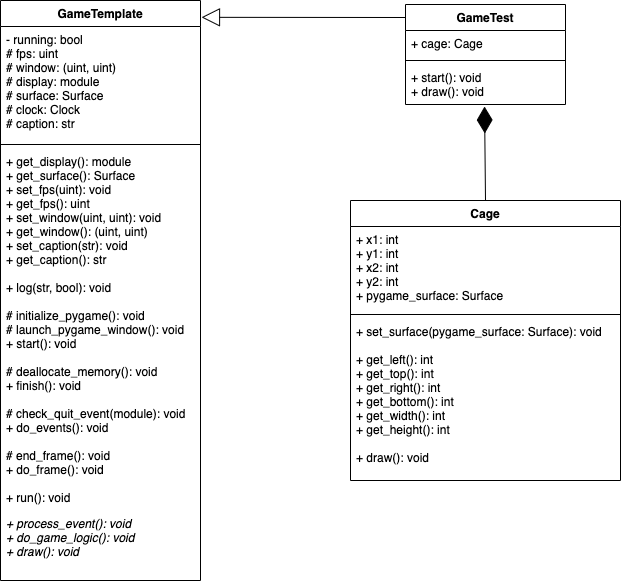

<br>[back to top ↥](#t12p4toc)

<a id='t12p4ball'></a>
#### **▇▂ Ball Class ▂▂**



Our ball will be a circle with center (position), radius, color and velocity vector $\vec{v}$. Velocity vector $\vec{v}$ represents how much position (x and y value) changes in each frame. Besides the usual sets, class `Ball` should contain methods do `draw()` itself onto a given surface, and `update()` to change its position per frame. `update()` should also check if the ball collided with the given cage and reflect.

In [ ]:
from random import randint

## BALL CLASS
class Ball:
    def __init__(self):
        # default values which should be overridden
        self.x = 10
        self.y = 10
        self.radius = 3
        self.color = WHITE
        self.vx = 0
        self.vy = 0
        self.pygame_surface = None

    # sets
    def set_surface(self, pygame_surface):
        self.pygame_surface = pygame_surface
    def set_position(self, position):
        self.x = position[0]
        self.y = position[1]
    def set_color(self, color):
        self.color = color
    def set_radius(self, radius):
        self.radius = radius
    def set_velocity(self, velocity_vector):
        self.vx = velocity_vector[0]
        self.vy = velocity_vector[1]

    # sets all ball parameters - creates a new ball
    def spawn(self, position, radius, color, velocity):
        self.set_position(position)
        self.set_color(color)
        self.set_radius(radius)
        self.set_velocity(velocity)

    # drawing method; needs surface to be set
    def draw(self):
        if self.pygame_surface == None:
            print("Warning! Ball-->draw() called without passing pygame surface!")
        else:
            pygame.draw.circle(self.pygame_surface, self.color,
                (self.x, self.y), self.radius)

    # reflections
    def reflect_horizontal(self):
        self.vy = -self.vy
    def reflect_vertical(self):
        self.vx = -self.vx
    def reflect(self):
        self.reflect_horizontal()
        self.reflect_vertical()

    # updates ball position and does reflection; to be called once per frame
    def update(self, cage):
        self.x += self.vx
        self.y += self.vy

        # horizontal reflection
        if self.y <= self.radius + cage.get_top():
            self.reflect_horizontal()
        elif self.y >= cage.get_bottom() - self.radius:
            self.reflect_horizontal()

        # vertical reflection
        if self.x <= self.radius + cage.get_left():
            self.reflect_vertical()
        elif self.x >= cage.get_right() - self.radius:
            self.reflect_vertical()

<br>[back to top ↥](#t12p4toc)

Let us make a game where a bouncing ball is spawned when user presses **space**.

In [ ]:
## BOUNCING BALL GAME CLASS
class BouncingBallGame(GameTemplate):
    def start(self):
        super().start()

        self.cage = Cage(50, 50, 750, 550)
        self.cage.set_surface(self.get_surface())

        self.ball = Ball()
        self.ball.set_surface(self.get_surface())
        self.ball_active = False


    def draw(self):
        self._surface.fill(BLACK)

        self.cage.draw()
        if self.ball_active:
            self.ball.draw()

    def spawn_ball(self, direction = 0):
        from random import randint

        # randomize initial values
        radius = randint(BALL_RADIUS_RANGE[0], BALL_RADIUS_RANGE[1])
        x = self.cage.get_left() + self.cage.get_width() // 2
        y = self.cage.get_top() + self.cage.get_height() // 2
        color_idx = randint(0, len(BALL_COLORS)-1)
        vx = randint(BALL_VELOCITY_RANGE[0], BALL_VELOCITY_RANGE[1])
        vy = randint(BALL_VELOCITY_RANGE[0], BALL_VELOCITY_RANGE[1])
        if randint(0, 1) == 1:
            vy = -vy
        # set x-direction (0 - random, 1 - right, -1 - left)
        if direction == 0:
            if randint(0, 1) == 1:
                vx = -vx
        elif direction == 1:
            pass
        else:
            vx = -vx

        self.ball.spawn((x,y), radius, BALL_COLORS[color_idx], (vx,vy))
        self.ball_active = True

    def process_event(self, event):
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                self.spawn_ball()

    def do_game_logic(self):
        self.ball.update(self.cage)

<br>[back to top ↥](#t12p4toc)

<a id='t12p4sb'></a>
##### **`spawn_ball()`**

Since we want to keep `process_event()` method clean, all lines related to the creation (spawn) of a new ball are moved to the helper method `spawn_ball()`. To allow additional flexibility later, `spawn_ball()` gets `direction` value, that is by default set to 0. It is used to indicate in which direction the ball should move initially:
-  1 right,
- -1 left,
-  0 randomly choose between left and right.

Radius is picked randomly between the given constants, x and y values are always the middle of the cage, and color is a random choice from a list of given colors. 

Finally, let us create a test game and see how it works.

In [ ]:
game = BouncingBallGame()

game.set_window(800,600)
game.set_caption("Bouncing ball test")
game.run()

Below you can find the corresponding UML class diagram.

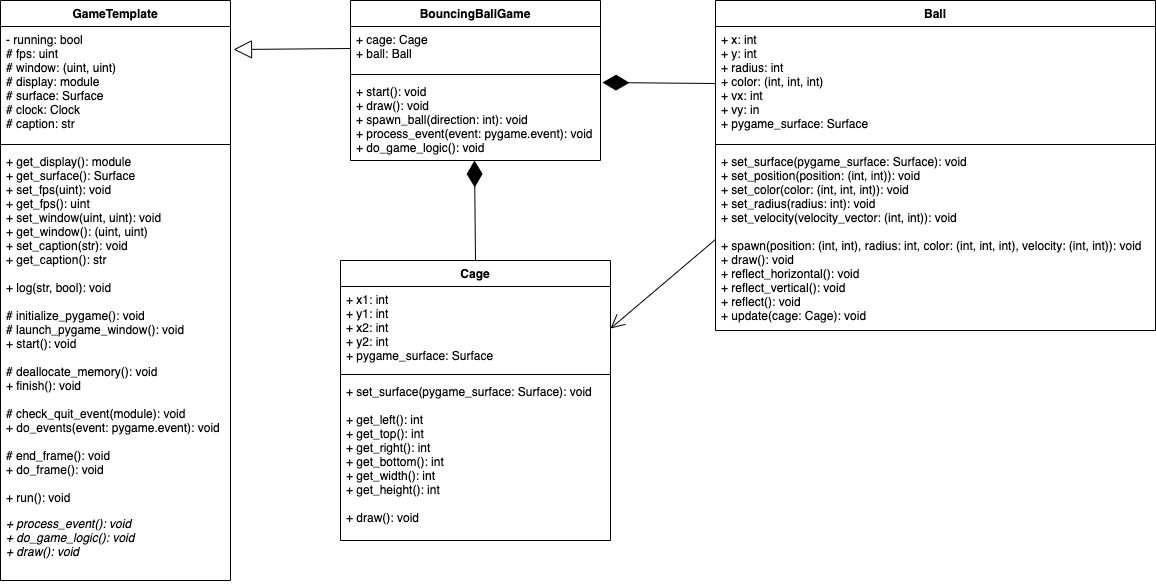

<br>[back to top ↥](#t12p4toc)

<a id='t12p4ex'></a>
#### **▇▂ Exercise: Multiple Bouncing Balls ▂▂**


Modify the code so that on each press of **space** button, additional ball is added. You should use `Cage` and `Ball` classes as they are, and just make a new child of `GameTemplate` class.

In [ ]:
## MULTIPLE BOUNCING BALLS GAME CLASS
class Exercise(GameTemplate):
    # remove 'pass' and implement this class
    pass



In [ ]:
game = Exercise()

game.set_window(800,600)
game.set_caption("Exercise")
game.run()

If you have done everything correctly, your application should look like in the picture below.

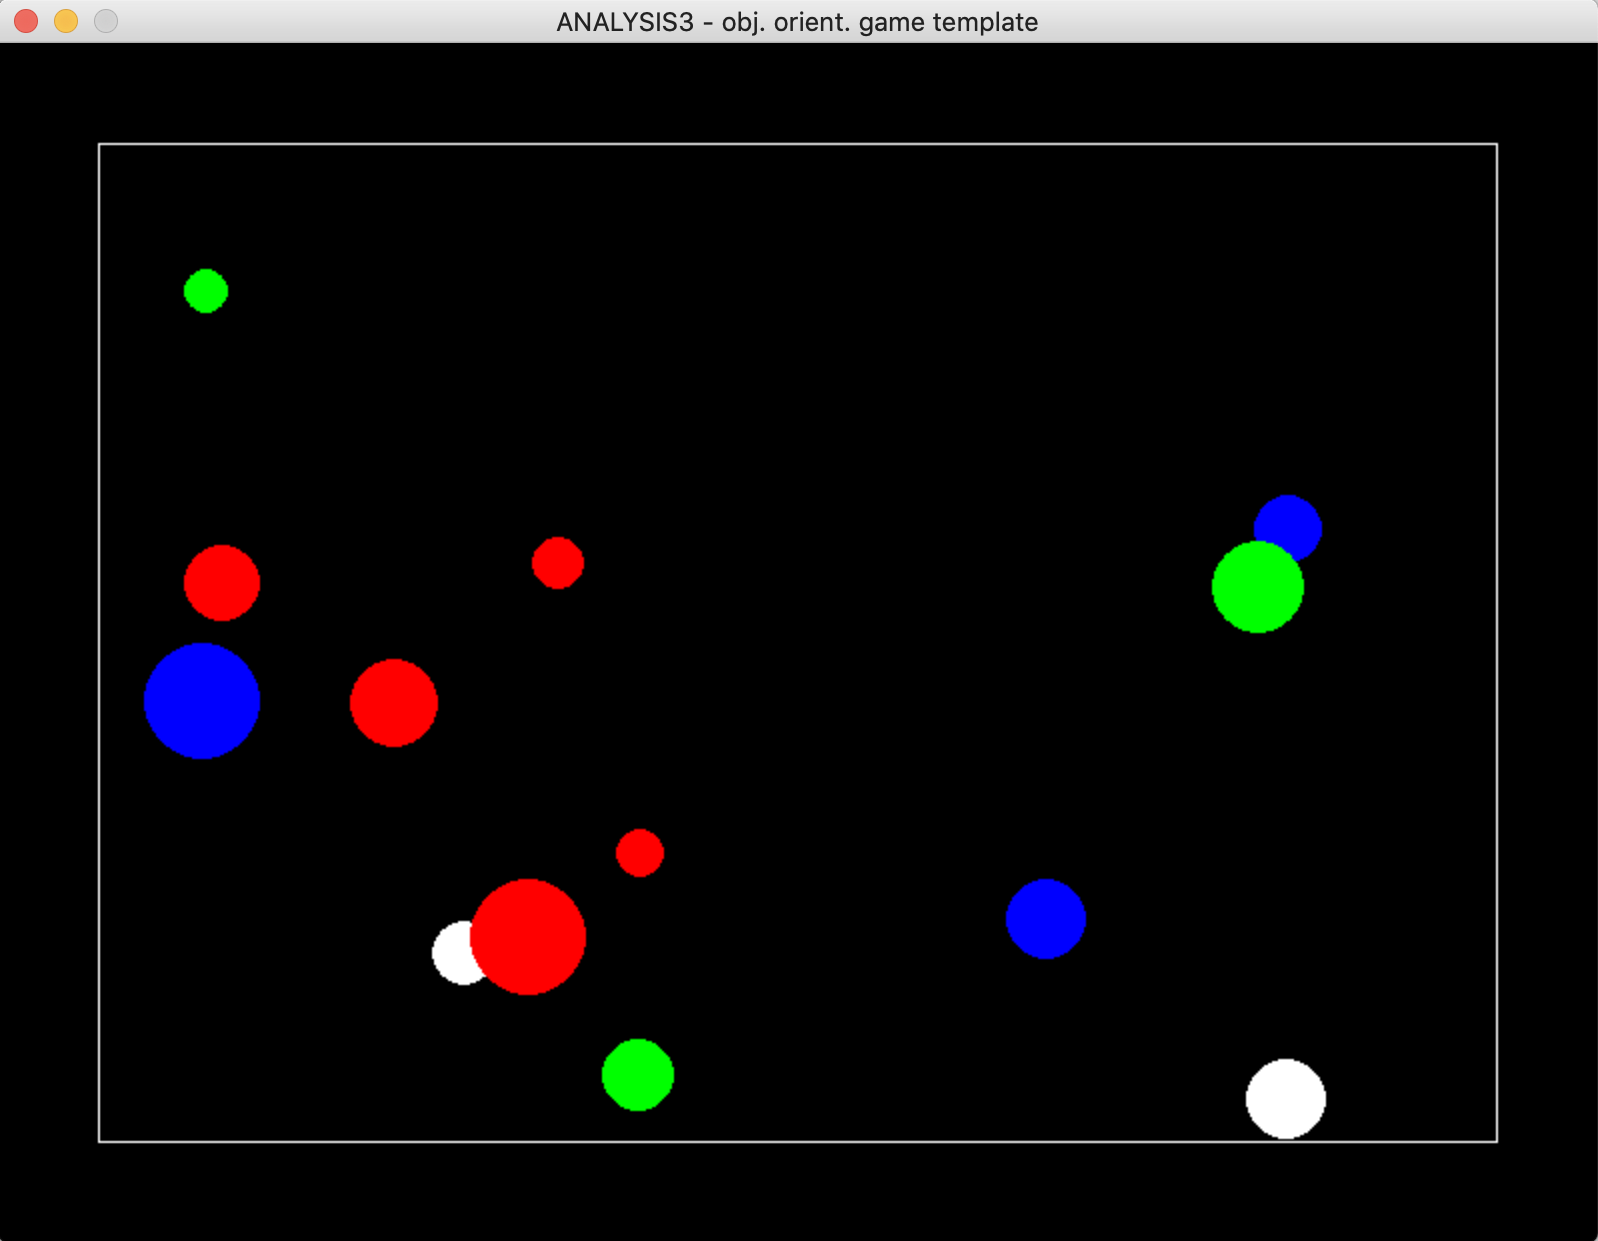

<br>[back to top ↥](#t12p4toc)

<a id='t12p4bls'></a>
##### **Challenge: Ball's Life Span**

The major strength of OOP is that it allows us to encapsulate lots of object-related information in it, and relieve us the need to handle those in the higher level. Modify `Ball` class such that each ball has its own `lifespan`. It could be a constant, or randomly selected value within a chosen interval. Then, update the `lifespan` after each reflection, and once the threshold is reached, remove the ball from the game.

<br>[back to top ↥](#t12p4toc)

<a id='t12p4collision'></a>
#### **▇▂ Collision ▂▂**

We will add one additional method to our `Ball` class, used to check if a given ball collides with another one. Since we are dealing with circles, the collision is an easy one: we have to compare the distance between circles' centers and the sum of their radii. When the distance between the centers is less or equal to the sum of radii, then the collision occurred.

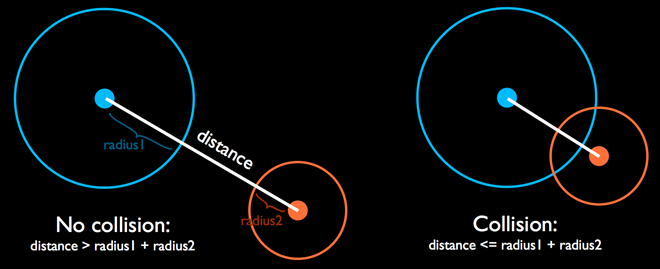

Since we are working in 2D environment, we can use Pythagoras theorem.

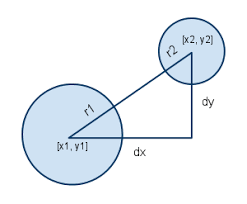

$$distance= \sqrt{{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2}$$

$$radii=r_1+r_2$$

Note: Games have to make hundreds of collision checks each frame, leading to even hundreds of thousands of calls per second. As *square root* is computationally expensive, in this specific case, we can use *square* of radii as an alternative.
$$ collision = \sqrt{{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2} \leq r_1+r_2$$
<center>gives the same Boolean value as: </center>
$$ collision = {(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 \leq {(r_1+r_2)}^2$$


The method `collide()`, to be added to `Ball` class, will look like this:
```
def collide(self, other_ball):
    dist_centers = (self.x - other_ball.x) **2 + (self.y - other_ball.y) **2
    dist_radii = (self.radius + other_ball.radius) **2
    if dist_centers <= dist_radii:
        return True
    else:
        return False
```

For your convenience, entire `Ball` class with `collide()` method is given in the cell below.

In [ ]:
## BALL CLASS
class Ball:
    def __init__(self):
        # default values which should be overridden
        self.x = 10
        self.y = 10
        self.radius = 3
        self.color = WHITE
        self.vx = 0
        self.vy = 0
        self.pygame_surface = None


    def set_surface(self, pygame_surface):
        self.pygame_surface = pygame_surface

    def set_position(self, position):
        self.x = position[0]
        self.y = position[1]

    def set_color(self, color):
        self.color = color

    def set_radius(self, radius):
        self.radius = radius

    def set_velocity(self, velocity_vector):
        self.vx = velocity_vector[0]
        self.vy = velocity_vector[1]

    def spawn(self, position, radius, color, velocity):
        self.set_position(position)
        self.set_color(color)
        self.set_radius(radius)
        self.set_velocity(velocity)

    def draw(self):
        if self.pygame_surface == None:
            print("Warning! Ball-->draw() called without passing pygame surface!")
        else:
            pygame.draw.circle(self.pygame_surface, self.color,
                (self.x, self.y), self.radius)

    def reflect_horizontal(self):
        self.vy = -self.vy

    def reflect_vertical(self):
        self.vx = -self.vx

    def reflect(self):
        self.reflect_horizontal()
        self.reflect_vertical()

    def collide(self, other_ball):
        # the collision happened if the distance between centers is smaller
        # than the sum of two radii
        dist_centers = (self.x - other_ball.x) **2 + (self.y - other_ball.y) **2
        dist_radii = (self.radius + other_ball.radius) **2
        if dist_centers <= dist_radii:
            return True
        else:
            return False

    def update(self, cage):
        self.x += self.vx
        self.y += self.vy

        # horizontal reflection
        if self.y <= self.radius + cage.get_top():
            self.reflect_horizontal()
        elif self.y >= cage.get_bottom() - self.radius:
            self.reflect_horizontal()

        # vertical reflection
        if self.x <= self.radius + cage.get_left():
            self.reflect_vertical()
        elif self.x >= cage.get_right() - self.radius:
            self.reflect_vertical()

<br>[back to top ↥](#t12p4toc)

<a id='t12p4bbg'></a>
#### **▇▂ Bouncing Balls Game ▂▂**

Combining the enhanced `Ball` class with the method `collide()`, together with the game class capable of handling multiple `Ball` objects ([exercise](#exercise)), we can make an application that clearly shows the strength of Object oriented paradigm. If you had difficulties making the exercise, then you can look at the code in the cell below.

Essentially, we do the following:
- In each step of the game (`do_game_logic()`), we update all `Ball` objects and then check for collision. For code clarity, handling collisions and reflections has been moved to the separate method `collision_and_reflection()`.
- In `collision_and_reflection()` each `Ball` object is checked against every other `Ball` object to determine if they collided. If this occurs, `reflect()` method will be called for those `Ball`s. Here, there is one additional problem, that a `Ball` object could collide with multiple other objects at the same time, and we want to call `reflect()` only once. Therefore, we add a temporary variable of type `set()` that will store objects that have collided, and then, call reflection at the end.
- When **space** button is pressed, we generate values for new `Ball` object, call `spawn()` and add it to the list of all objects.
- When spawning a new `Ball` object, it may happen that another `Ball` object occupies the same space - they could partially or completely overlap. In that case, it would cause infinite reflections and balls would not move, hence we want to prevent spawn in such a case. To accomplish this, we check for collision of newly generated `Ball` object with every other object, and add it to the list **only** if no collision was detected. If you want a challenge, a more elegant solution would be to create a que, where all newly generated balls would be placed. Then, each frame, the game should check if the space is free and put the ball from the que into the game.


The corresponding UML class diagram, as well as complete implementation of `BouncingBallsGame` class can be found below.

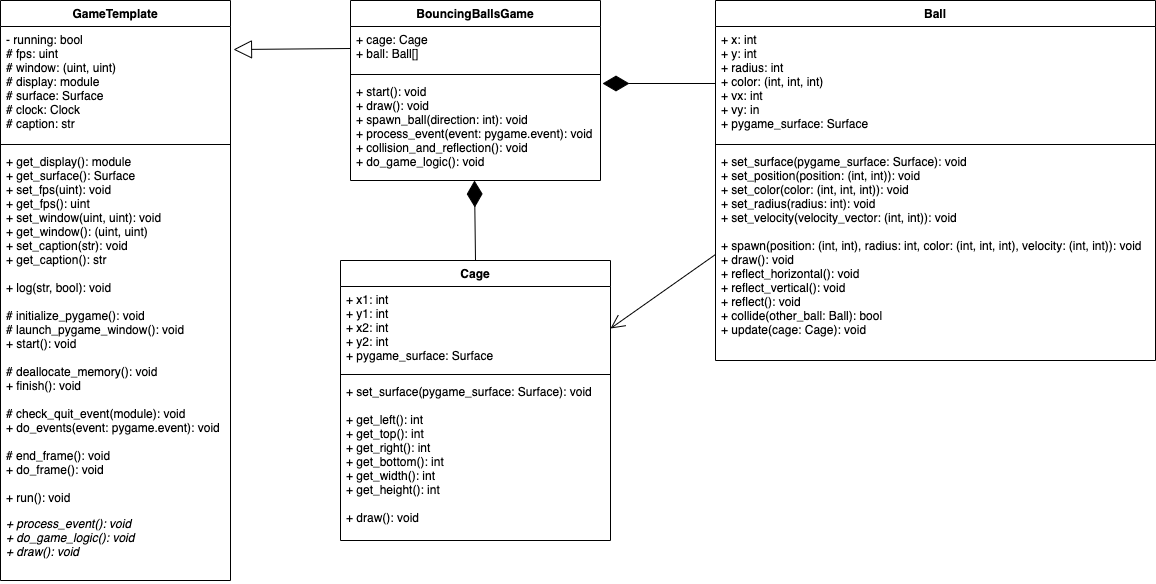

<br>[back to top ↥](#t12p4toc)

In [ ]:
## BOUNCING BALLS GAME CLASS
class BouncingBallsGame(GameTemplate):
    def start(self):
        super().start()

        self.cage = Cage(50, 50, 750, 550)
        self.cage.set_surface(self.get_surface())

        self.balls = []


    def draw(self):
        self._surface.fill(BLACK)

        self.cage.draw()
        for ball in self.balls:
            ball.draw()

    def spawn_ball(self, direction = 0):
        from random import randint

        # generate ball params.
        radius = randint(BALL_RADIUS_RANGE[0], BALL_RADIUS_RANGE[1])
        x = self.cage.get_left() + self.cage.get_width() // 2
        y = self.cage.get_top() + self.cage.get_height() // 2
        color_idx = randint(0, len(BALL_COLORS)-1)
        vx = randint(BALL_VELOCITY_RANGE[0], BALL_VELOCITY_RANGE[1])
        vy = randint(BALL_VELOCITY_RANGE[0], BALL_VELOCITY_RANGE[1])
        if randint(0, 1) == 1:
            vy = -vy
        # process direction (x-axis)
        if direction == 0:
            if randint(0, 1) == 1:
                vx = -vx
        elif direction == 1:
            pass
        else:
            vx = -vx

        # create new ball object
        new_ball = Ball()
        new_ball.set_surface(self.get_surface())
        new_ball.spawn((x,y), radius, BALL_COLORS[color_idx], (vx,vy))

        # only add the new ball if it doesn't spawn into any other ball
        collides = False
        for ball in self.balls:
            if new_ball.collide(ball):
                collides = True
                break
        if not collides:
            self.balls.append(new_ball)

    def process_event(self, event):
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                self.spawn_ball()

    def collision_and_reflection(self):
        to_reflect = set()
        n = len(self.balls)
        for i in range(0, n-1):
            for j in range(i+1, n):
                if self.balls[i].collide(self.balls[j]):
                    to_reflect.add(i)
                    to_reflect.add(j)

        for idx in to_reflect:
            self.balls[idx].reflect()

    def do_game_logic(self):
        for ball in self.balls:
            ball.update(self.cage)

        self.collision_and_reflection()

Instantiate our game class and run the game.

In [ ]:
game = BouncingBallsGame()

game.set_window(800,600)
game.set_caption("Bouncing Balls Game")
game.run()

<br>[back to top ↥](#t12p4toc)

<a id='t12p4discussion'></a>
#### **▇▂ Discussion ▂▂**


Running the game will produce a result similar to the image below. 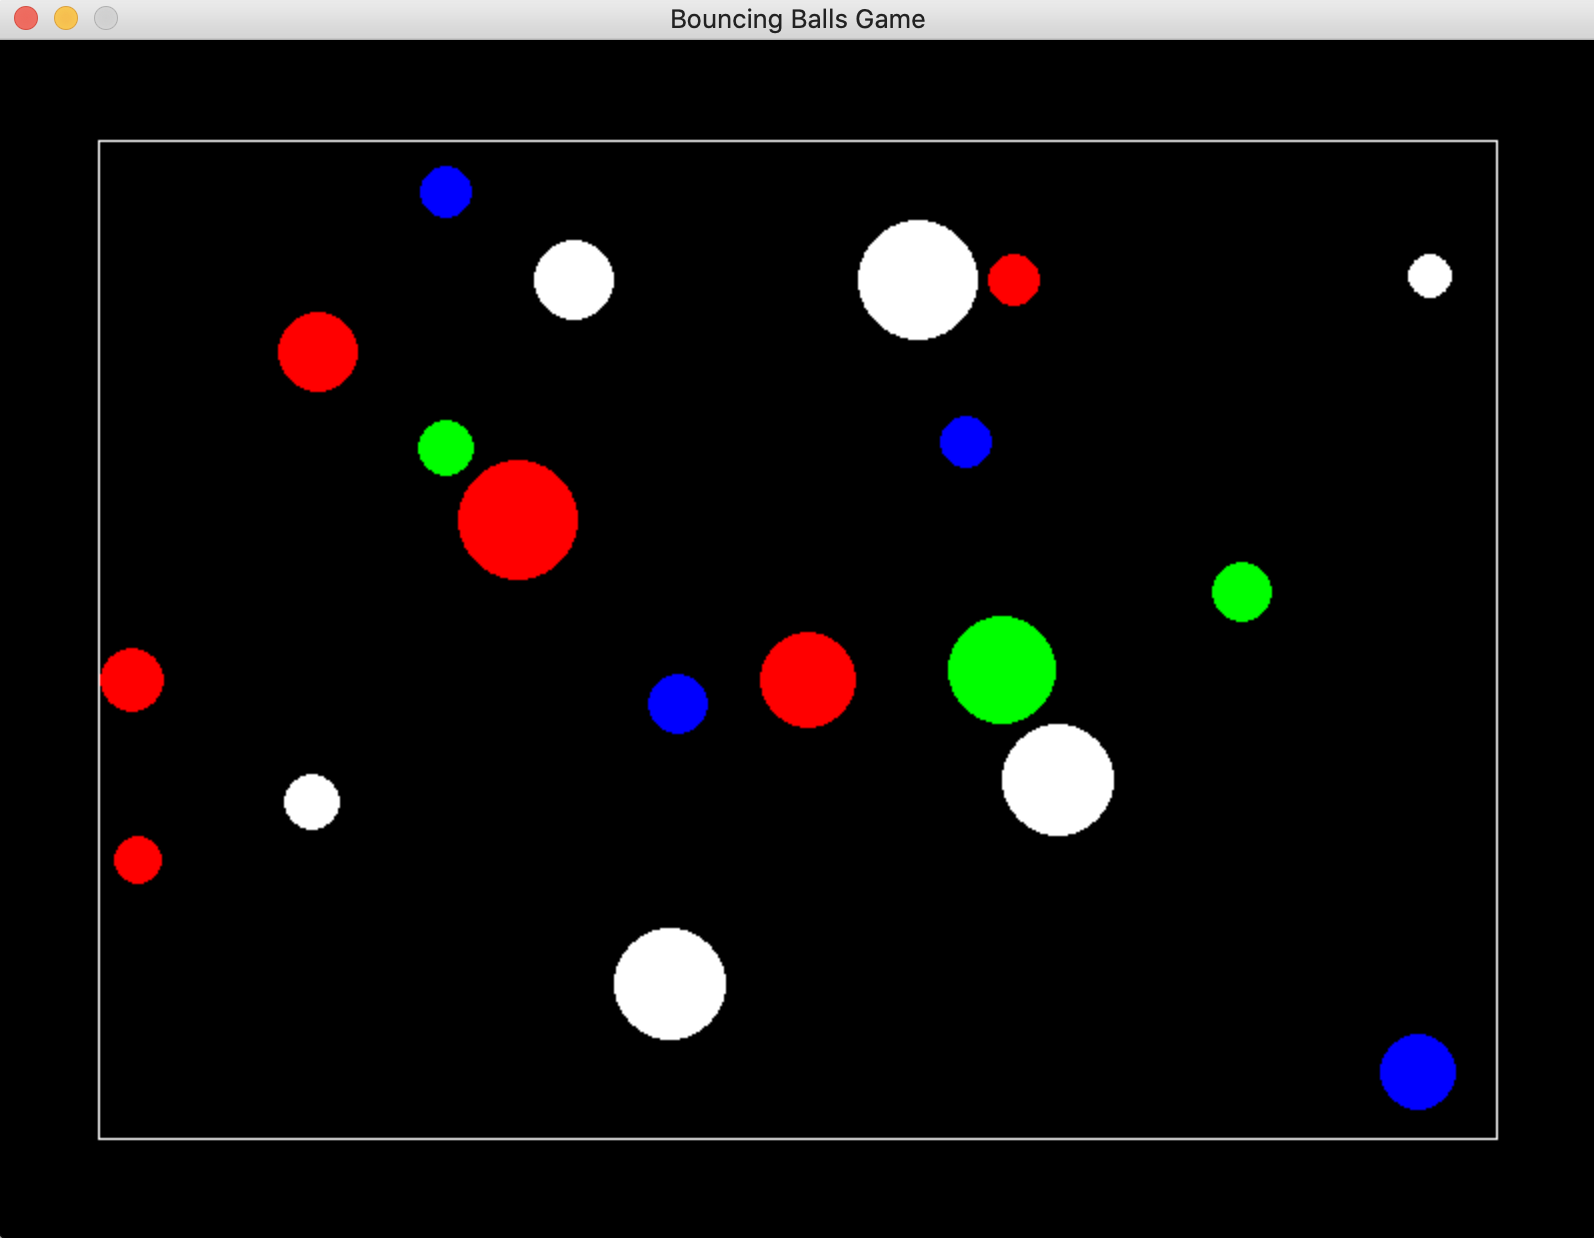

This application is developed using Object oriented paradigm, but it could have also been developed as pure procedural code.
- Discuss how would you handle collision detection and reflection for each ball, if OOP was not available? How would it reflect complexity and clarity of the code?
- If you want to add additional objects with different behavior in the game, how would you approach it?
- Besides the advantages mentioned in the previous questions, can you identify other benefits from using OOP?

<br>[back to top ↥](#t12p4toc)